# Imágenes grises

# 1.Importación librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2.Importación fuente de datos

In [2]:
# mnist es un paquete que tiene 70mil imágenes para entrenar a tu modelo
from tensorflow.keras.datasets import mnist

# Por defecto hace split de train=6/7 y test=1/7
(x_train, y_train), (x_test, y_test) = mnist.load_data()

2023-03-12 23:01:00.076759: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-12 23:01:00.394931: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-12 23:01:00.394946: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-12 23:01:01.275279: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

# 3. Procesando

## 3.1 Visualización de imágenes

In [5]:
img1 = x_train[0]

In [6]:
img1

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
img1.shape

(28, 28)

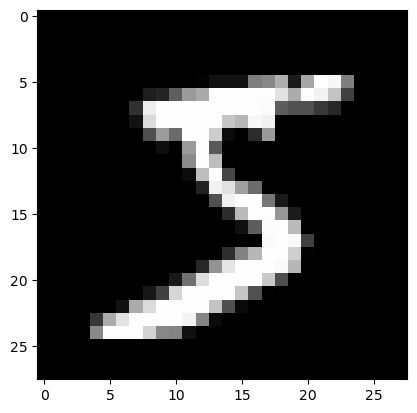

In [8]:
# Imprimir primera imagen
plt.imshow( img1, cmap="gray" )

In [9]:
x_test.shape

(10000, 28, 28)

## 3.2 Transformación categórica

In [10]:
# Etiquetas de salida
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Las etiquetas son categorías de números, es necesario traducir con "one hot encoder" para que la CNN 
pueda interpretarlo, si no la CNN pensará que es algún tipo de regresión en un eje continuo

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train.shape

(60000,)

In [14]:
categ_y_train = to_categorical(y_train)

In [15]:
categ_y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
categ_y_train.shape

(60000, 10)

In [17]:
categ_y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
# 10 es el número de categorías
y_cat_train = to_categorical(y_train, 10)

In [19]:
y_cat_test = to_categorical(y_test, 10)

## 3.3 Escalado

In [20]:
img1.max()

255

In [21]:
img1.min()

0

In [22]:
# Escalamos los valores (1/255) para que los valores estén entre 0 y 1
x_train = x_train/255
x_test = x_test/255

In [23]:
img1_esc = x_train[0]
img1_esc.max()

1.0

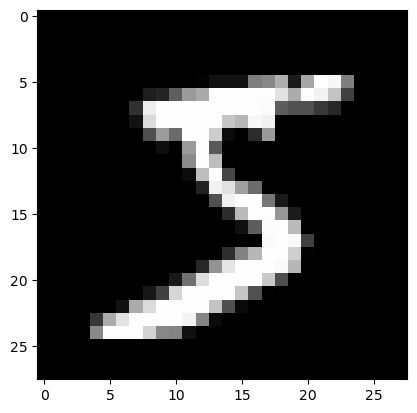

In [24]:
plt.imshow(img1_esc, cmap="gray")

In [25]:
img1_esc

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Redimensionar imágenes

In [26]:
x_train.shape

(60000, 28, 28)

In [27]:
x_test.shape

(10000, 28, 28)

Aplicamos reshape para incluir la dimensión del canal (en este caso, al ser B&N solamente sería 1 canal)

In [28]:
x_train = x_train.reshape( x_train.shape[0], x_train.shape[1], x_train.shape[2], 1 )
x_train.shape

(60000, 28, 28, 1)

In [29]:
x_test = x_test.reshape( x_test.shape[0], x_test.shape[1], x_test.shape[2], 1 )
x_test.shape

(10000, 28, 28, 1)

# 4. Creación del modelo

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [31]:
model = Sequential()

# Número de filtros creciente conforme mayor tamaño
# kernel_size es la rejilla donde se aplica el filtro
# Capa Convolucional
model.add(Conv2D( filters=32, kernel_size=(4, 4), input_shape=(28, 28, 1), activation="relu" ))
# Capa Pooling
model.add(MaxPool2D( pool_size=(2, 2) ))

# Capa Flatten:
#   Convierte las imágenes de 28x28 en un array de 1 demensión
#   de 28x28=764 valores antes de la capa final
model.add(Flatten())

# Capa Dense (neuronas = potencia de 2, variable para optimizar modelo)
model.add(Dense(128, activation="relu"))

# Capa final de clasificación (10 posibles clases = 10 neuronas)
model.add(Dense(10, activation="softmax"))

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"] # metricas
)

# metricas: Se pueden agregar adicionales doc: https://keras.io/metrics/

2023-03-12 23:01:05.003003: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-12 23:01:05.003418: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-12 23:01:05.003528: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-12 23:01:05.003575: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-12 23:01:05.003619: W tensorflow/c

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

# 5. Entrenamiento del modelo

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
eStop = EarlyStopping(monitor="val_loss", patience=3)

In [35]:
model.fit(
    x_train,
    y_cat_train,
    epochs=10,
    validation_data=(x_test, y_cat_test),
    callbacks=[eStop]
)

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1344 - accuracy: 0.9594 - val_loss: 0.0625 - val_accuracy: 0.9797
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0434 - val_accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.0371 - val_accuracy: 0.9873
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0189 - accuracy: 0.9937 - val_loss: 0.0374 - val_accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0147 - accuracy: 0.9950 - val_loss: 0.0432 - val_accuracy: 0.9873
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0092 - accuracy: 0.9972 - val_loss: 0.0442 - val_accuracy: 0.9876


In [36]:
losses = pd.DataFrame(model.history.history)

In [37]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.134378,0.959433,0.062537,0.9797
1,0.044956,0.986100,0.043442,0.9862
2,0.029274,0.990800,0.037059,0.9873
3,0.018900,0.993717,0.037377,0.9894
4,0.014748,0.994983,0.043158,0.9873


<AxesSubplot:>

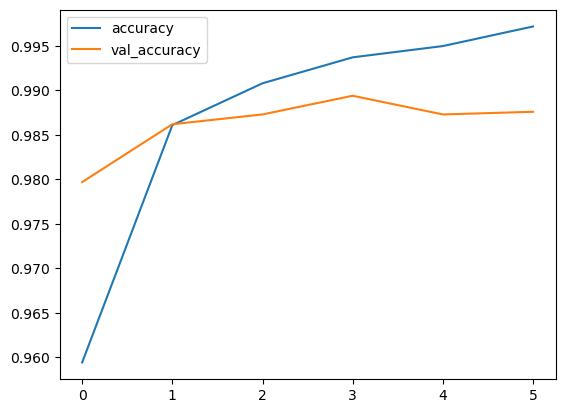

In [41]:
losses[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

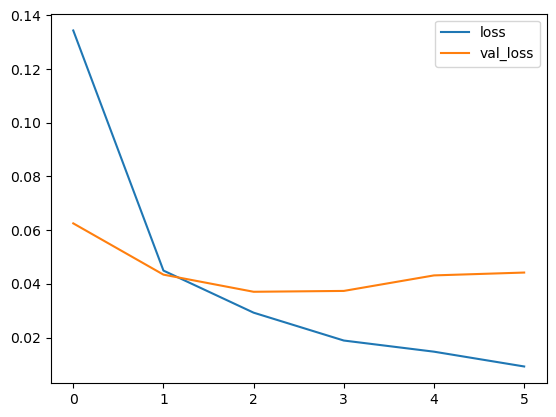

In [42]:
losses[["loss", "val_loss"]].plot()

In [43]:
print( model.metrics_names )
print( model.evaluate( x_test, y_cat_test, verbose=0 ) )

['loss', 'accuracy']
[0.04421844333410263, 0.9876000285148621]


# 6. Evaluación del modelo

## 6.1 Predicción sobre el conjunto de test

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
# model.predict_classes(x_test) Fue deprecada
# Classificatión multiclass:
#     np.argmax(model.predict(x_test), axis=-1)
# Binary classificatión:
#     (model.predict(X_test) > 0.5).astype("int32")
predicciones = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 1s 2ms/step


In [51]:
y_cat_test.shape

(10000, 10)

In [52]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [53]:
predicciones[0]

7

In [54]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [55]:
print( classification_report(y_test, predicciones) )

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [56]:
confusion_matrix(y_test, predicciones)

array([[ 976,    0,    0,    0,    0,    0,    2,    0,    1,    1],
       [   0, 1130,    1,    0,    0,    0,    1,    2,    1,    0],
       [   2,    2, 1015,    1,    1,    0,    1,    8,    2,    0],
       [   1,    0,    2,  998,    0,    4,    0,    1,    2,    2],
       [   0,    0,    0,    0,  971,    0,    3,    0,    1,    7],
       [   2,    0,    0,    4,    0,  875,    8,    0,    3,    0],
       [   6,    2,    0,    0,    1,    1,  948,    0,    0,    0],
       [   0,    1,    2,    0,    0,    0,    0, 1019,    2,    4],
       [   7,    1,    2,    0,    0,    1,    2,    0,  959,    2],
       [   2,    2,    0,    6,    3,    4,    0,    2,    5,  985]])

In [57]:
import seaborn as sns

<AxesSubplot:>

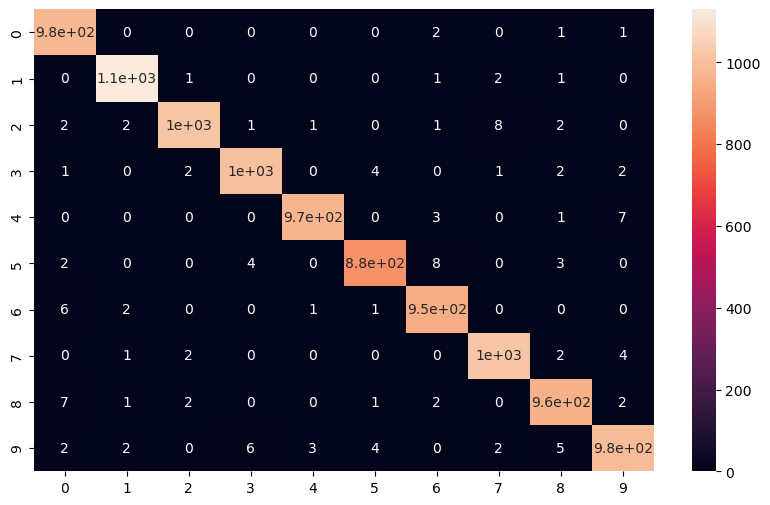

In [58]:
plt.figure( figsize=(10, 6) )
sns.heatmap( confusion_matrix(y_test, predicciones), annot=True )

## 6.2 Predicciones para una nueva imagen

In [68]:
# Ejemplo con cualquier imagen del conjunto de test
nImg = x_test[64]
nImg.shape

(28, 28, 1)

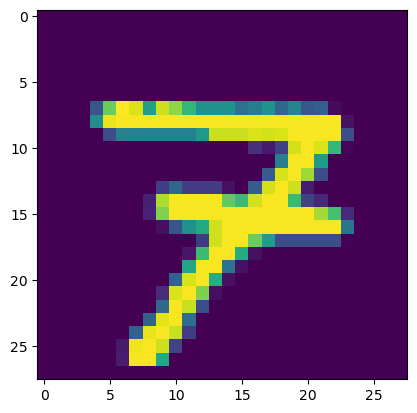

In [69]:
# Quitar la información del canal
plt.imshow( nImg.reshape(28, 28) )

In [70]:
res = np.argmax(model.predict(
    nImg.reshape(1, 28, 28, 1)
))

1/1 [==============================] - 0s 16ms/step


In [71]:
res

7